In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting

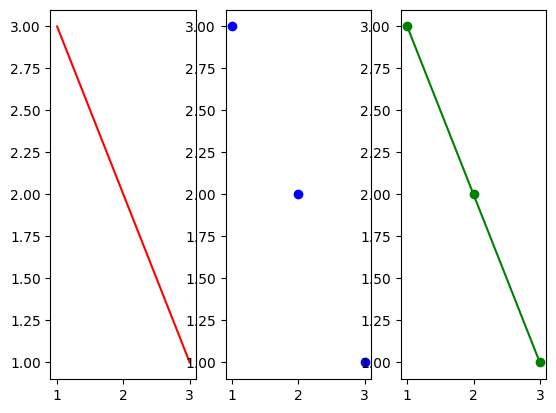

In [2]:
x = [1, 2, 3]
y = [3, 2, 1]

figure, axis = plt.subplots(1, 3)

axis[0].plot(x, y, color='r')
axis[1].scatter(x, y, color='b')
axis[2].plot(x, y, color='g')
axis[2].scatter(x, y, color='g')

plt.show()

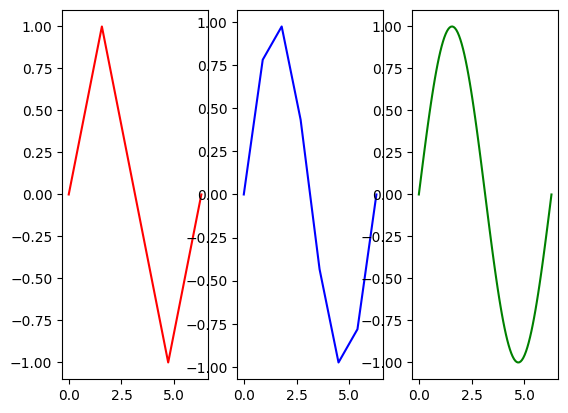

In [3]:
x1 = np.linspace(0, 2*np.pi, 5)
x2 = np.linspace(0, 2*np.pi, 8)
x3 = np.linspace(0, 2*np.pi, 100)
y1 = [np.sin(i) for i in x1]
y2 = [np.sin(i) for i in x2]
y3 = [np.sin(i) for i in x3]

figure, axis = plt.subplots(1, 3)

axis[0].plot(x1, y1, color='r')
axis[1].plot(x2, y2, color='b')
axis[2].plot(x3, y3, color='g')

plt.show()

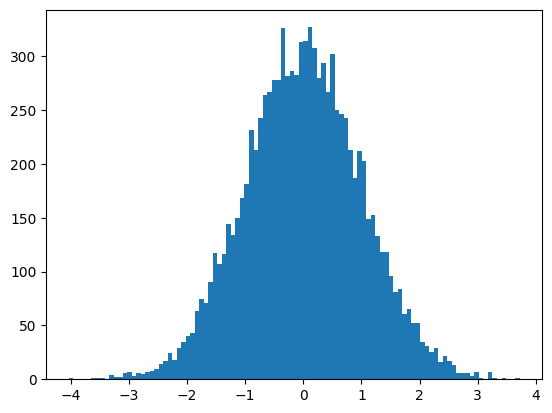

In [4]:
x = np.random.randn(10000)

plt.hist(x, bins=100)
plt.show()

In [5]:
print(x[x < -3], '\n')
print(x[x < -3].size)

[-4.03362181 -3.05715266 -3.54508461 -3.1858565  -3.11463975 -3.27223429
 -3.61016628 -3.01478937 -3.25892965 -3.00790508 -3.09188699 -3.24236693
 -3.03521959 -3.08596652 -3.29158763 -3.44766172 -3.00934818 -3.09756716
 -3.09121549 -3.30442926 -3.16893797] 

21


# Pandas
## Dataframes

In [6]:
df = pd.DataFrame({'name': ['Ali', 'Mina'], 'age': [25, 22]})
df

,name,age
0,Ali,25
1,Mina,22


### read dataframes from the given path
```
path = ''
df = pd.read_csv(path)
```

### column names
```
df.columns
```

In [7]:
df.columns

Index(['name', 'age'], dtype='object')

### getting informations of a dataframe
```
df.info()
```

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2 non-null      object
 1   age     2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes


### statistics analysis of a dataframe
```
df.describe()               # only includes numeric columns
df.describe(include='all')  # includes all columns, including strings
```

In [9]:
df.describe()

,age
count,2.00000
mean,23.50000
std,2.12132
min,22.00000
25%,22.75000
50%,23.50000
75%,24.25000
max,25.00000


In [10]:
df.describe(include='all')

,name,age
count,2,2.00000
unique,2,NaN
top,Ali,NaN
freq,1,NaN
mean,NaN,23.50000
std,NaN,2.12132
min,NaN,22.00000
25%,NaN,22.75000
50%,NaN,23.50000
75%,NaN,24.25000


### slicing dataframes
```
df[df.column_name > value]
```

In [11]:
df[df.age > 22]

,name,age
0,Ali,25


### datafram head & tail
```
df.head(5)
df.tail(5)
```

# clustering
## k-means

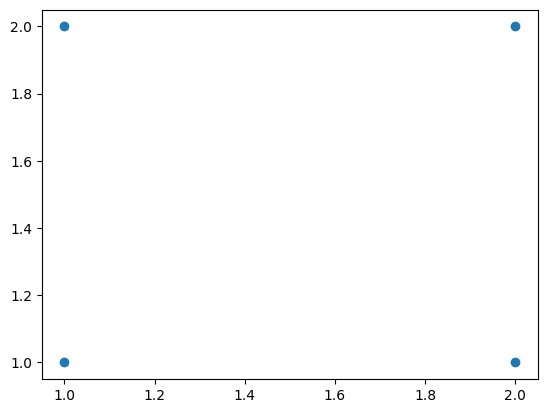

In [12]:
df = pd.DataFrame({'x':[1, 2, 1, 2], 'y':[1, 1, 2, 2]})

plt.scatter(df.x, df.y)
plt.show()

In [13]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [14]:
k_means = KMeans(n_clusters=2)
k_means.fit(df)

KMeans(n_clusters=2)

In [15]:
print('labels:', k_means.labels_)
print('inertia:', k_means.inertia_)

labels: [0 0 1 1]
inertia: 1.0


### K-means limitations
* Setting a value for k
* Numeric variables only
* Sensetive to initial conditions
* Data has no noises or outliers
* Data has symmertric distribution of variables
* Good in spherical-like shapes
* Variables in the same scale
* There is no collinearity

### Evaluation metrics & Elbow method
**Inertia**
$$ Inertia = \sum_{j=1}^k \sum_{i=1}^n ||x_i^{(j)} - c_j||^2 $$
$$ k = \text{number of clusters} $$
$$ n = \text{number of cases} $$
$$ c = \text{centroid for cluster j} $$
$$ x = \text{case i of cluster j} $$
$$ ||\text{formula}|| = distance function $$
<br>

<div style="text-align: center">
    <img src="https://media.licdn.com/dms/image/D4D12AQF-yYtbzPvNFg/article-cover_image-shrink_720_1280/0/1682277078758?e=1697673600&v=beta&t=-U7aWnM4lGUdjAQPhcNzlybSsKEF6H7f2-FymLPhER4">
</div>

k = 1
labels = [0 0 0 0]
inercia = 2.0
------------
k = 2
labels = [1 1 0 0]
inercia = 1.0
------------
k = 3
labels = [2 1 0 0]
inercia = 0.5
------------
k = 4
labels = [0 2 3 1]
inercia = 0.0
------------


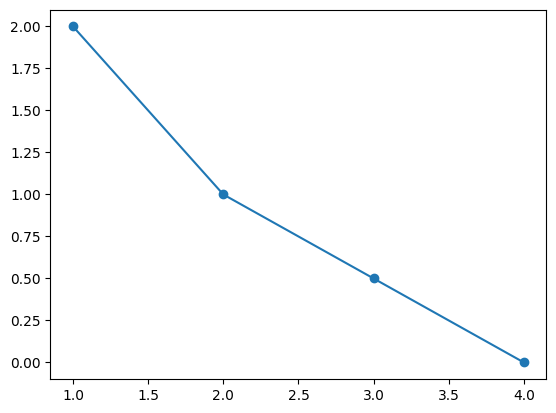

In [16]:
x = []
y = []
for k in range(1, 5):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    
    print('k =', k)
    print('labels =', k_means.labels_)
    print('inercia =', k_means.inertia_)
    print('------------')

    x.append(k)
    y.append(k_means.inertia_)

plt.scatter(x, y)
plt.plot(x, y)
plt.show()

## Outliers & Noise

**Outlier** <br>
A data point that deviates significantly from the majority of other data points in a dataset.

**noise** <br>
Refers to random or irrelevant variations present in data that can obscure meaningful patterns or relationships.
<br>

<div style="text-align: center">
    <img src="https://www.researchgate.net/profile/Shahla-Asadi/publication/339483610/figure/fig1/AS:862802700947464@1582719602359/Example-of-single-and-batch-outliers-in-sensory-data.png"/>
</div>

### Outlier Detection Methods
* IQR (Interquaritile Range)
* Z-score
* LOF (Local Outlier Factor)
* Isolation Forest
* DBSCAN
* etc.

### k-means example

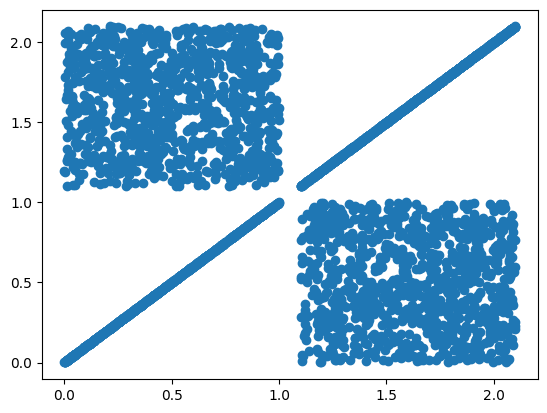

In [17]:
a = np.random.rand(1000)
b = np.random.rand(1000) + 1.1

x = np.concatenate((a, a, b, b))
y = np.concatenate((a, b, a, b))

plt.scatter(x, y)
plt.show()

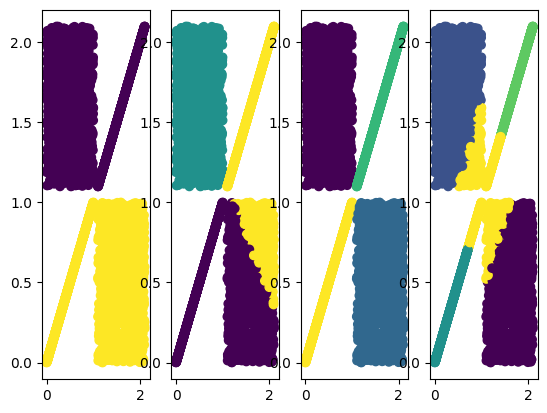

<Figure size 1000x500 with 0 Axes>

In [18]:
df = pd.DataFrame({'x': x, 'y': y})

k_means_2 = KMeans(n_clusters=2)
k_means_3 = KMeans(n_clusters=3)
k_means_4 = KMeans(n_clusters=4)
k_means_5 = KMeans(n_clusters=5)

k_means_2.fit(df)
k_means_3.fit(df)
k_means_4.fit(df)
k_means_5.fit(df)

figure, axis = plt.subplots(1, 4)


axis[0].scatter(df.x, df.y, c=k_means_2.labels_)
axis[1].scatter(df.x, df.y, c=k_means_3.labels_)
axis[2].scatter(df.x, df.y, c=k_means_4.labels_)
axis[3].scatter(df.x, df.y, c=k_means_5.labels_)

plt.figure(figsize=(10, 5), dpi=100)

plt.show()

#### Visualizing elbow method in this example

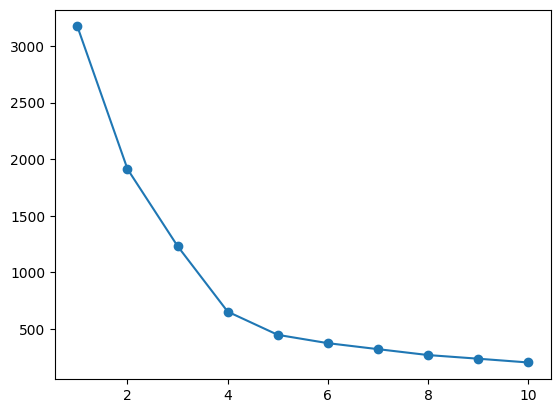

In [19]:
inertia = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)

    inertia.append(k_means.inertia_)

plt.scatter(range(1, 11), inertia)
plt.plot(range(1, 11), inertia)

plt.show()


let's add an outlier point

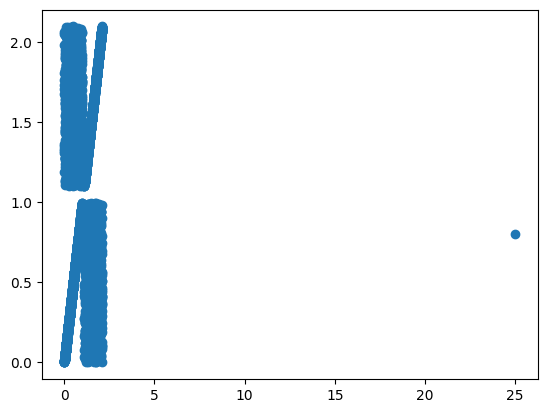

In [20]:
a = np.random.rand(1000)
b = np.random.rand(1000) + 1.1

x = np.concatenate((a, a, b, b, np.array([25])))
y = np.concatenate((a, b, a, b, np.array([0.8])))

plt.scatter(x, y)
plt.show()

not let's fit k-means on this dataset with k=4

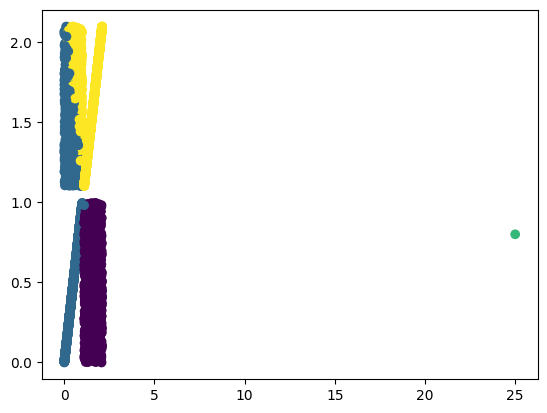

<Figure size 2500x500 with 0 Axes>

In [21]:
df = pd.DataFrame({'x': x, 'y': y})

k_means = KMeans(n_clusters=4)

k_means.fit(df)

plt.scatter(df.x, df.y, c=k_means.labels_)
plt.figure(figsize=(25, 5), dpi=100)

plt.show()

### Outlier Handling
* Reporting
* Removing
* Imputation
* Transision
* Capping & Flooring
* Data Segmentation

#### Feature Scaling

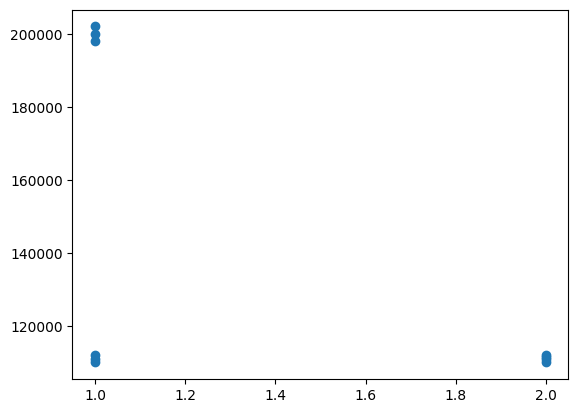

In [22]:
x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

df = pd.DataFrame({'x': x, 'y': y})

plt.scatter(df.x, df.y)
plt.show()

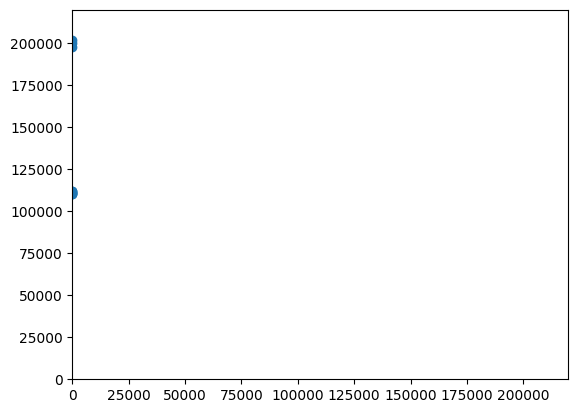

In [23]:
plt.xlim(0, 220000)
plt.ylim(0, 220000)

plt.scatter(df.x, df.y)
plt.show()

### Normalization

$$ X_{new} = {X - X_{min} \over X_{max} - X_{min}} $$

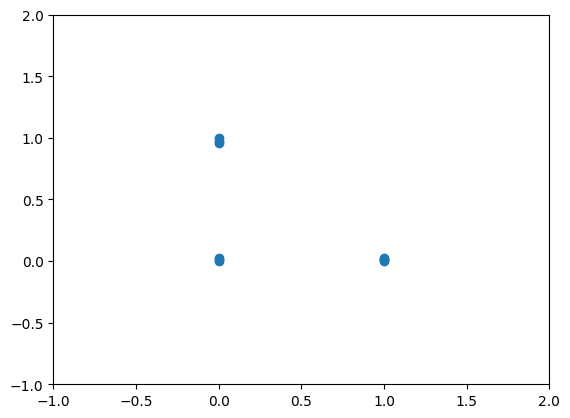

In [24]:
x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

df = pd.DataFrame({'x': x, 'y': y})

# Normalization
df.x = (df.x - df.x.min()) / (df.x.max() - df.x.min())
df.y = (df.y - df.y.min()) / (df.y.max() - df.y.min())

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()

### Standardization

$$ X' = {X - \text{Mean} \over \text{Standard Deviation}} $$

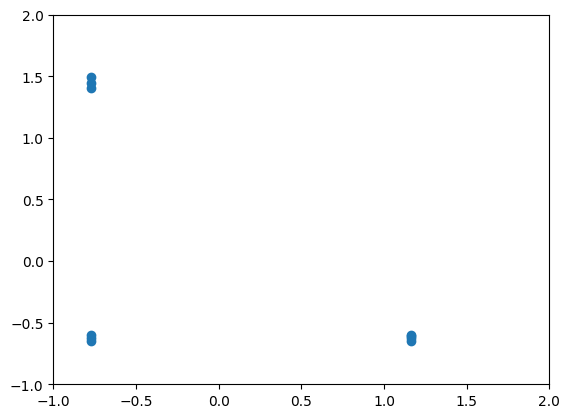

In [25]:
x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

df = pd.DataFrame({'x': x, 'y': y})

# Normalization
df.x = (df.x - df.x.mean()) / (df.x.std())
df.y = (df.y - df.y.mean()) / (df.y.std())

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()

### Feature Scaling using sklearn - Normalization

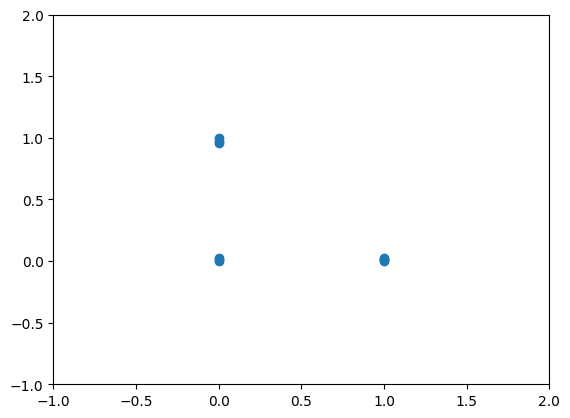

In [27]:
from sklearn.preprocessing import MinMaxScaler

x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

scaler = MinMaxScaler()

df = pd.DataFrame({'x': x, 'y': y})
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()


### Feature Scaling using sklearn - Standardization

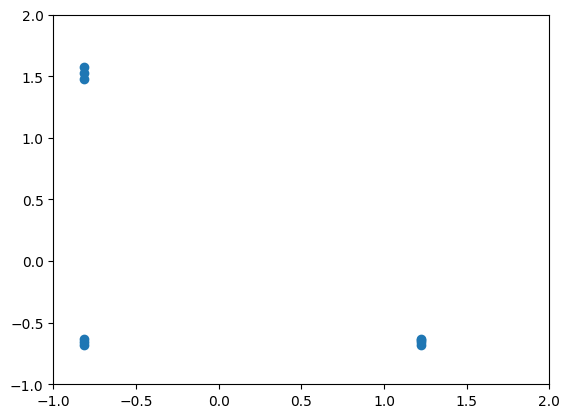

In [28]:
from sklearn.preprocessing import StandardScaler

x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

scaler = StandardScaler()

df = pd.DataFrame({'x': x, 'y': y})
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()


## Other k-Clustering Algorithms
* **KMeans++** <br>
A method for initializing clustel centroids in K-means clustering that selects centroids with a higher probability of being distant from each other.

* **KMedoids** <br>
A clustering algorithm that uses actual data points as cluster representatives (medoids) instead of centroids, making it more robust to outliers.

* **KModes** <br>
A clustering algorithm designed for categorical data that identifies clusters based on the most frequent categorical values.

* **KPrototype** <br>
A hybrid clustering algorithm that combines K-means for numerical data and K modes for categorical data to handle mixed data types within a dataset.

## Covariance & Correlation

Covariance is used to understand the relationship between two variables and how they might move in relation to each other. <br>

$$ Cov(x, y) = {\sum(x_i - \={x}) * (y_i - \={y}) \over N}  $$

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables. It not only shows the kind of relation (in terms of direction), but also how strong the relationship is.

$$ Correlation = {Cov(x, y) \over \sigma{x} * \sigma{y}}$$

### Missing Values Handling
* Row Deletion
* Column Deletion
* Mean/Median/Mode Imputation
* Regression
* KNN
* Interpolation
* Predictive Models
* Grouping Techniques

# Example - RFM

In [57]:
df = pd.read_excel('datasets/RFM.xlsx')
df.head(5)

,شماره مشتری,تاریخ,stock_code,نام کالا,quantity,unit_price
0,224356,12/11/2018,5585,دلستر خانواده,4.0,30000
1,224356,12/11/2018,5586,دلستر قوطی,4.0,30000
2,224356,12/16/2018,5370,شیر 250 cc,4.0,14000
3,224356,12/23/2018,3531,شیر قهوه موکا,2.0,14000
4,224356,12/23/2018,8596,آب پرتقال 250 cc,3.0,14000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412253 entries, 0 to 412252
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   شماره مشتری  412253 non-null  int64  
 1   تاریخ        412253 non-null  object 
 2   stock_code   412253 non-null  int64  
 3   نام کالا     412253 non-null  object 
 4   quantity     412253 non-null  float64
 5   unit_price   412253 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ MB


Farsi characters make data unreadable. Let's rename Farsi column names to English.

In [59]:
df = df.rename(columns={
    'شماره مشتری': 'customer_id',
    'تاریخ': 'date',
    'نام کالا': 'product_name'
})

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412253 entries, 0 to 412252
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customer_id   412253 non-null  int64  
 1   date          412253 non-null  object 
 2   stock_code    412253 non-null  int64  
 3   product_name  412253 non-null  object 
 4   quantity      412253 non-null  float64
 5   unit_price    412253 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ MB


In [61]:
df.date.min(), df.date.max()

('1/1/2019', '9/8/2019')

we need to see the period during which data has been collected. But the given min and max dates above are incorrect, because the data type of date is string. min and max functions are comparing string values instead of date values.

In [62]:
df['date'] = pd.to_datetime(df['date'])
df.date.min(), df.date.max()

(Timestamp('2018-12-01 00:00:00'), Timestamp('2019-12-30 00:00:00'))

Let's get the number of distinct products

In [63]:
print('unique products:', df.stock_code.unique())
print('number of unique products:', df.stock_code.nunique())

unique products: [5585 5586 5370 3531 8596 8775 7178 5125 5587 5584]
number of unique products: 10


Also, we can get the number of each product sold separately.

In [64]:
df.stock_code.value_counts()

stock_code
8775    122305
8596    114370
3531     80202
5370     69820
7178     14989
5125      4112
5585      3691
5586      2761
5587         2
5584         1
Name: count, dtype: int64

Note that both `stocke_code` and `product_name` representing same thing, so we can remove one of them since keeping them both does not give us any additional information.

In [65]:
df = df.drop(['product_name'], axis=1)
df.head(5)

,customer_id,date,stock_code,quantity,unit_price
0,224356,2018-12-11,5585,4.0,30000
1,224356,2018-12-11,5586,4.0,30000
2,224356,2018-12-16,5370,4.0,14000
3,224356,2018-12-23,3531,2.0,14000
4,224356,2018-12-23,8596,3.0,14000


In [66]:
df.describe()

,customer_id,date,stock_code,quantity,unit_price
count,4.122530e+05,412253,412253.000000,412253.000000,412253.000000
mean,2.651539e+07,2019-07-11 13:10:56.465810688,6984.052361,3.444537,14250.409336
min,2.243560e+05,2018-12-01 00:00:00,3531.000000,-97.000000,14000.000000
25%,4.706288e+06,2019-04-16 00:00:00,5370.000000,2.000000,14000.000000
50%,4.433706e+07,2019-07-27 00:00:00,8596.000000,4.000000,14000.000000
75%,4.455676e+07,2019-10-15 00:00:00,8775.000000,5.000000,14000.000000
max,4.943186e+07,2019-12-30 00:00:00,8775.000000,300.000000,30000.000000
std,1.984150e+07,NaN,2121.276685,3.274752,1985.913922


As can be seen, we have negative value for quantity. it is because some customers have asked for a refund.

In [67]:
df[df.quantity < 0]

,customer_id,date,stock_code,quantity,unit_price
14,224356,2019-03-02,3531,-6.0,14000
15,224356,2019-03-16,5370,-2.0,14000
16,224356,2019-03-16,8775,-2.0,14000
26,224356,2019-09-25,3531,-1.0,14000
27,224356,2019-10-14,3531,-1.0,14000
...,...,...,...,...,...
412242,49332232,2019-12-11,3531,-3.0,14000
412243,49332232,2019-12-11,8596,-2.0,14000
412246,49332232,2019-12-14,3531,-1.0,14000
412247,49332232,2019-12-14,8596,-1.0,14000


we can eliminate negative values for quantity, since each negative value has a positive peer (customer should first buy the product to ask for refund on it).

In [68]:
df = df[df.quantity > 0]
df.shape

(354755, 5)

In [72]:
df['total'] = df['quantity'] * df['unit_price']
df.head(5)

,customer_id,date,stock_code,quantity,unit_price,total
0,224356,2018-12-11,5585,4.0,30000,120000.0
1,224356,2018-12-11,5586,4.0,30000,120000.0
2,224356,2018-12-16,5370,4.0,14000,56000.0
3,224356,2018-12-23,3531,2.0,14000,28000.0
4,224356,2018-12-23,8596,3.0,14000,42000.0


### Monetary

In [75]:
df.groupby('customer_id')['total'].sum()

customer_id
224356       1309600.0
276154        960400.0
279696       3872400.0
1301753     47076800.0
1393653      9864800.0
               ...    
45151176      137200.0
45151177       61600.0
45333469    23477600.0
49332232     1251600.0
49431856       70000.0
Name: total, Length: 8961, dtype: float64

### Frequency

In [76]:
df.groupby('customer_id')['date'].nunique()

customer_id
224356       13
276154        8
279696       27
1301753     128
1393653      81
           ... 
45151176      3
45151177      3
45333469     97
49332232     10
49431856      1
Name: date, Length: 8961, dtype: int64

### Recency
Last purchase of each customer was on which day?

In [77]:
df.groupby('customer_id')['date'].max()

customer_id
224356     2019-11-24
276154     2019-12-30
279696     2019-12-17
1301753    2019-12-26
1393653    2019-12-24
              ...    
45151176   2019-12-04
45151177   2019-12-08
45333469   2019-12-29
49332232   2019-12-17
49431856   2019-02-27
Name: date, Length: 8961, dtype: datetime64[ns]

How long has passed since the last purchase of each customer?

In [81]:
most_recent_purchase = df['date'].max()
most_recent_purchase - df.groupby('customer_id')['date'].max()

customer_id
224356      36 days
276154       0 days
279696      13 days
1301753      4 days
1393653      6 days
             ...   
45151176    26 days
45151177    22 days
45333469     1 days
49332232    13 days
49431856   306 days
Name: date, Length: 8961, dtype: timedelta64[ns]

In [84]:
def func(date):
    return (most_recent_purchase - date).days + 1  # with respect to 2020-01-01

df['date_diff'] = df.date.apply(func)
df.head(5)


,customer_id,date,stock_code,quantity,unit_price,total,date_diff
0,224356,2018-12-11,5585,4.0,30000,120000.0,385
1,224356,2018-12-11,5586,4.0,30000,120000.0,385
2,224356,2018-12-16,5370,4.0,14000,56000.0,380
3,224356,2018-12-23,3531,2.0,14000,28000.0,373
4,224356,2018-12-23,8596,3.0,14000,42000.0,373


In [85]:
df.groupby('customer_id')['date_diff'].min()

customer_id
224356       37
276154        1
279696       14
1301753       5
1393653       7
           ... 
45151176     27
45151177     23
45333469      2
49332232     14
49431856    307
Name: date_diff, Length: 8961, dtype: int64

### RFM - all in one dataframe

In [106]:
dfRFM = df.groupby('customer_id').agg({
    'date_diff': 'min',
    'date': 'nunique',
    'total': 'sum'
    })

dfRFM.columns = ['R', 'F', 'M']
dfRFM

,R,F,M
customer_id,,,
224356,37,13,1309600.0
276154,1,8,960400.0
279696,14,27,3872400.0
1301753,5,128,47076800.0
1393653,7,81,9864800.0
...,...,...,...
45151176,27,3,137200.0
45151177,23,3,61600.0
45333469,2,97,23477600.0


In [107]:
def plot_3d(data, labels, x, y, z):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection = '3d')
    ax.scatter(data[x], data[y], data[z], c = labels)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

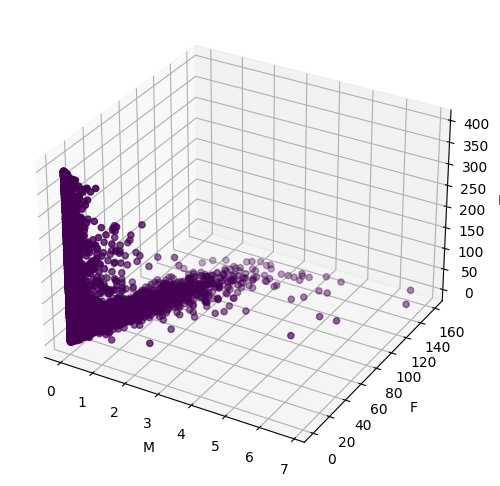

In [108]:
plot_3d(dfRFM, [0 for _ in range(len(dfRFM))], 'M', 'F', 'R')

In [109]:
dfRFM.corr()

,R,F,M
R,1.000000,-0.326563,-0.251831
F,-0.326563,1.000000,0.883375
M,-0.251831,0.883375,1.000000


<Axes: >

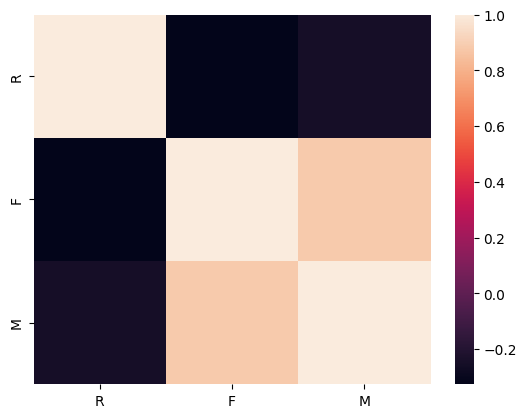

In [110]:
sns.heatmap(dfRFM.corr())

<Axes: >

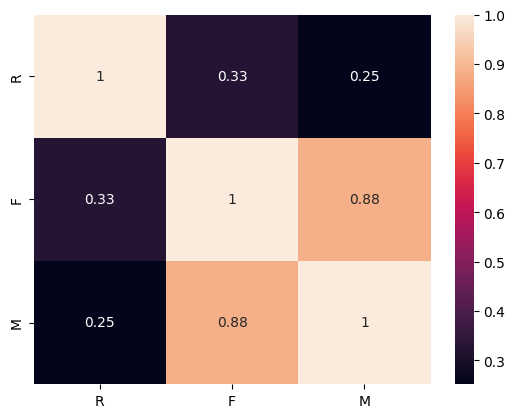

In [111]:
sns.heatmap(abs(dfRFM.corr()), annot=True)

In [112]:
dfRFM['A'] = dfRFM['M'] / dfRFM['F']  # average price of each purchase

<Axes: >

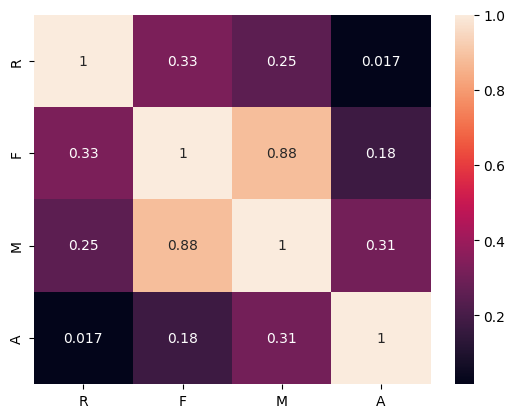

In [113]:
sns.heatmap(abs(dfRFM.corr()), annot=True)

<Axes: >

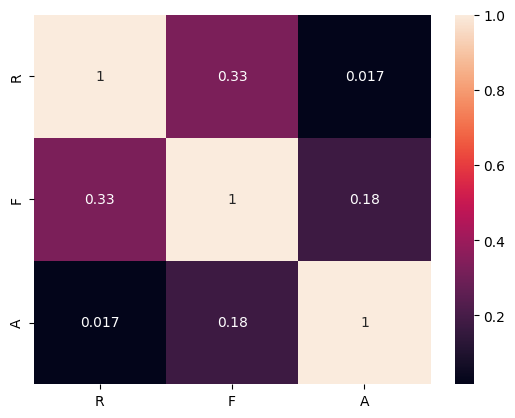

In [114]:
dfRFM = dfRFM.drop('M', axis=1)
sns.heatmap(abs(dfRFM.corr()), annot=True)

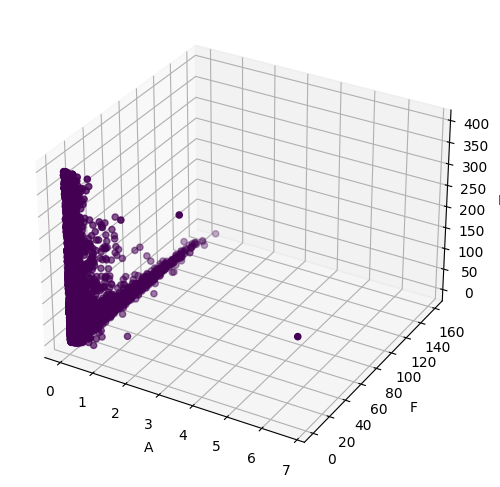

In [115]:
plot_3d(dfRFM, [0 for _ in range(len(dfRFM))], 'A', 'F', 'R')

### Detecting Outlier

In [116]:
dfRFM.shape

(8961, 3)

In [118]:
from sklearn.ensemble import IsolationForest

labels = IsolationForest(contamination=0.01).fit_predict(dfRFM)

In [121]:
dfRFM['status'] = labels
dfRFM.head(5)  # status of value -1 are outliers

,R,F,A,status
customer_id,,,,
224356,37,13,100738.461538,1
276154,1,8,120050.000000,1
279696,14,27,143422.222222,1
1301753,5,128,367787.500000,-1
1393653,7,81,121787.654321,1


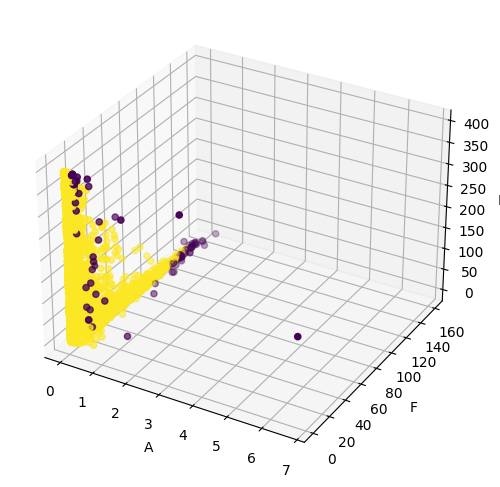

In [127]:
plot_3d(dfRFM, labels, 'A', 'F', 'R')

In [129]:
dfRFM_without_outlier = dfRFM[dfRFM['status'] == 1]
dfRFM_without_outlier


,R,F,A,status
customer_id,,,,
224356,37,13,100738.461538,1
276154,1,8,120050.000000,1
279696,14,27,143422.222222,1
1393653,7,81,121787.654321,1
1395712,58,3,107333.333333,1
...,...,...,...,...
45151176,27,3,45733.333333,1
45151177,23,3,20533.333333,1
45333469,2,97,242037.113402,1


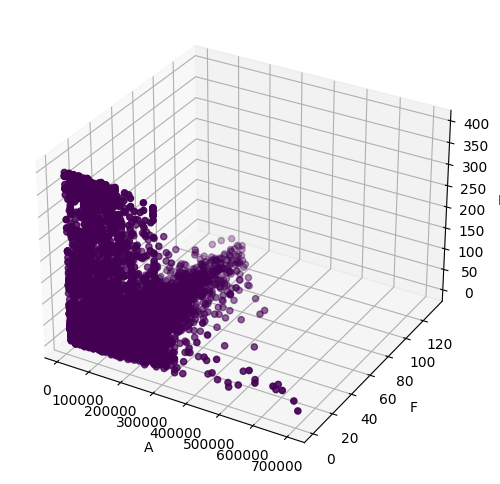

In [135]:
plot_3d(dfRFM_without_outlier, dfRFM_without_outlier['status'], 'A', 'F', 'R')

# Regression

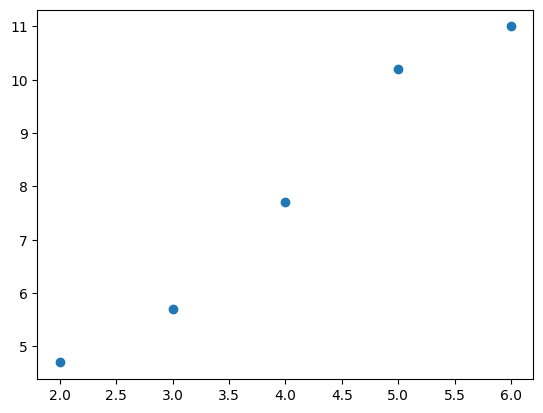

In [144]:
x = np.array([2, 3, 4, 5, 6])
y = np.array([4.7, 5.7, 7.7, 10.2, 11])

plt.scatter(x, y)
plt.show()

In [146]:
cov = np.sum((x - x.mean()) * (y - y.mean()))
var = np.sum((x - x.mean()) ** 2)

m = cov / var  # slope
b = y.mean() - m * x.mean()

In [157]:
print('m:', m)
print('b:', b)

m: 1.7099999999999997
b: 1.0200000000000005


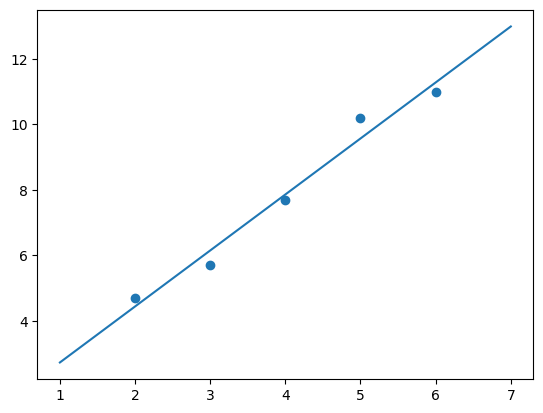

In [148]:
plt.scatter(x, y)
Xs = list(range(1, 8))
Ys = [m * i + b for i in Xs]
plt.plot(Xs, Ys)
plt.show()

### using sklearn

In [149]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [151]:
reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [158]:
print('m:', reg.coef_)
print('b:', reg.intercept_)

m: [[1.71]]
b: [1.02]


In [163]:
0.1 + 0.2

0.30000000000000004

# Simple Polynomial Regression

# Classification
## Logistic Recression

In [167]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], n_features=5, random_state=42)  # 95% of labels are 0 and 5% are 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)


In [168]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [171]:
y_pred = model.predict(X_test)
sum(y_pred == y_test)

176

## KNN

In [179]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('r2:', r2)


Accuracy: 1.0
r2: 1.0


In [182]:
X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_features=5, random_state=42)  # 95% of labels are 0 and 5% are 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('r2:', r2)


Accuracy: 0.955
precision: 0.8
recall: 0.5333333333333333
f1: 0.64
r2: 0.3513513513513514


#### Class_weight and Sample_weight

In [186]:
X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_features=5, random_state=42)  # 95% of labels are 0 and 5% are 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, class_weight={0: 1, 1: 9})
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('r2:', r2)


Accuracy: 0.875
precision: 0.3611111111111111
recall: 0.8666666666666667
f1: 0.5098039215686274
r2: -0.8018018018018016


In [187]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [188]:
model.fit?

Signature: model.fit(X, y, sample_weight=None)
Docstring:
Fit the model according to the given training data.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training vector, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : array-like of shape (n_samples,)
    Target vector relative to X.

sample_weight : array-like of shape (n_samples,) default=None
    Array of weights that are assigned to individual samples.
    If not provided, then each sample is given unit weight.

    .. versionadded:: 0.17
       *sample_weight* support to LogisticRegression.

Returns
-------
self
    Fitted estimator.

Notes
-----
The SAGA solver supports both float64 and float32 bit arrays.
File:      ~/Desktop/Git/Hackathon/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py
Type:      method